In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib
from nltk.metrics import edit_distance
import missingno as msno

#import pandas_profiling as pp

# Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
#show multiple outputs from one cell

pd.set_option('display.max_columns', None)

#pd.set_option('display.max_rows', None)

#display all columns and rows

In [3]:
df=pd.read_csv(r"C:\Users\holly\Desktop\DAExercises\Class9_DataManipulation\titanic.csv")

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
df.shape

(891, 15)

In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
331,0,1,male,45.5,0,0,28.5,S,First,man,True,C,Southampton,no,True


In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
df.nunique()

#Return number of unique elements in the object. It counts the number of unique entries over columns or rows.
#It is very useful in categorical features especially in cases where we do not know the number of categories beforehand.

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [11]:
df.nlargest(5, "age")
#Returns the first n rows ordered by columns in descending order.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [12]:
df.nlargest(7, "fare")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False


In [13]:
df.nsmallest(5, "age")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False


In [14]:
dupes=df.duplicated()
dupes.sum()

107

In [15]:
df.corr()
#This function is used to find the pairwise correlation of all columns in the dataframe.

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [16]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [17]:
df["age"].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: age, Length: 88, dtype: int64

### Bar chart using Matplotlib- Fare based on grouping (Man, Woman, Child)

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

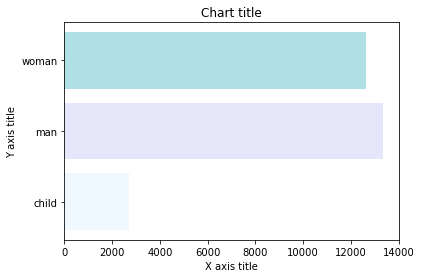

In [18]:
who_fare=df.groupby('who')['fare'].sum().to_frame().reset_index()

#Creating the bar chart 
plt.barh(who_fare['who'],who_fare['fare'],color = ['#F0F8FF','#E6E6FA','#B0E0E6']) 

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

#Show the plot
plt.show()

### Bar chart using Seaborn

<AxesSubplot:xlabel='fare', ylabel='who'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

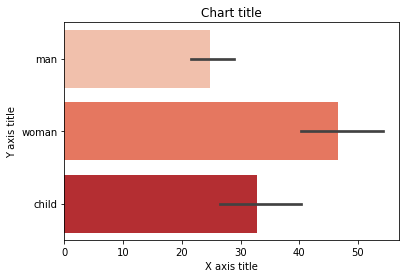

In [19]:

#Creating bar plot
sns.barplot(x = 'fare',y = 'who',data = df,palette = "Reds")

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
# Show the plot
plt.show()

### Column chart

### Column charts are mostly used when we need to compare a single category of data between individual sub-items, for example, when comparing revenue between regions


<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

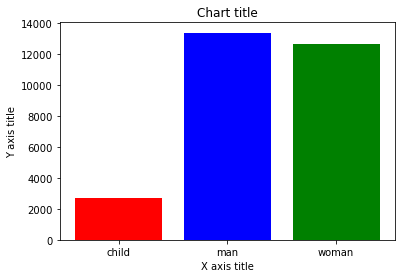

In [20]:
# Column chart using Matplotlib

#Creating the dataset
# df = sns.load_dataset('titanic') 
# df=df.groupby('who')['fare'].sum().to_frame().reset_index()

#done with variable who_fare

#Creating the column plot 
plt.bar(who_fare['who'],who_fare['fare'],color = ['red','blue','green']) 

#['#F0F8FF','#E6E6FA','#B0E0E6'] shades of blue

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

#Show the plot
plt.show()

### Column chart using Seaborn

<AxesSubplot:xlabel='who', ylabel='fare'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

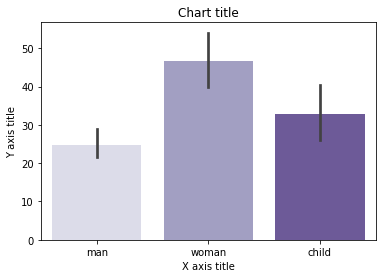

In [21]:
#Reading the dataset
#titanic_dataset = sns.load_dataset('titanic')

#Creating column chart
sns.barplot(x = 'who',y = 'fare',data = df,palette = "Purples")

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')

# Show the plot
plt.show()

**Grouped bar chart**

**A grouped bar chart is used when we want to compare the values in certain groups and sub-groups**

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

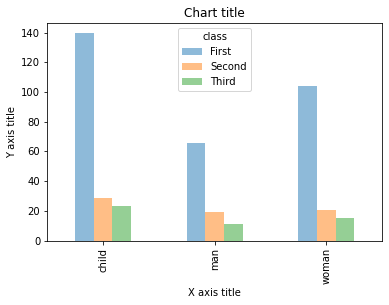

In [22]:
#Grouped bar chart using Matplotlib
#Creating the dataset
#df = sns.load_dataset('titanic')

df_pivot = pd.pivot_table(df, values="fare",index="who",columns="class", aggfunc=np.mean)

#Creating a grouped bar chart
ax = df_pivot.plot(kind="bar",alpha=0.5)

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

# Show the plot
plt.show()

### Grouped bar chart using Seaborn

<AxesSubplot:xlabel='who', ylabel='fare'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

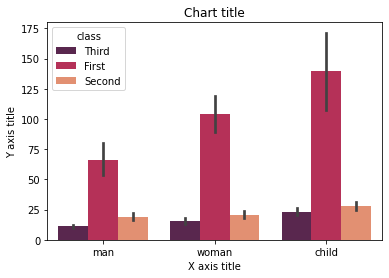

In [23]:
#Reading the dataset
#titanic_dataset = sns.load_dataset('titanic')

#Creating the bar plot grouped across classes
sns.barplot(x = 'who',y = 'fare',hue = 'class',data = df, palette = "rocket")

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
# Show the plot
plt.show()

### Stacked bar chart

### A stacked bar chart is used when we want to compare the total sizes across the available groups and the composition of the different sub-groups


<AxesSubplot:xlabel='A'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

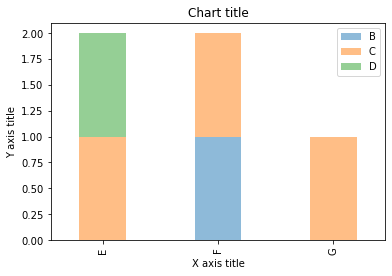

In [24]:
#Stacked bar chart using Matplotlib

# Stacked bar chart 
#Creating the dataset
df = pd.DataFrame(columns=["A","B", "C","D"], 
                  data=[["E",0,1,1],
                        ["F",1,1,0],
                        ["G",0,1,0]])

df.plot.bar(x='A', y=["B", "C","D"],  stacked=True,  width = 0.4,alpha=0.5) 

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')  

#Show the plot
plt.show()


<AxesSubplot:>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

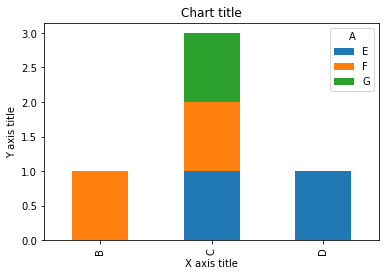

In [25]:
#stacked bar chart using Seaborn

dataframe = pd.DataFrame(columns=["A","B", "C","D"], 
                  data=[["E",0,1,1],
                        ["F",1,1,0],
                        ["G",0,1,0]])
dataframe.set_index('A').T.plot(kind='bar', stacked=True)

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

# Show the plot
plt.show()

### Line chart

### A line chart is used for the representation of continuous data points. This visual can be effectively utilized when we want to understand the trend across time.

### Line chart using Matplotlib

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

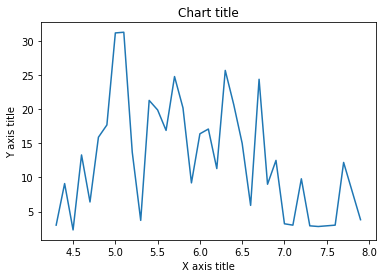

In [26]:
#Creating the dataset
df = sns.load_dataset("iris") 
df=df.groupby('sepal_length')['sepal_width'].sum().to_frame().reset_index()

#Creating the line chart
plt.plot(df['sepal_length'], df['sepal_width'])

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

#Show the plot
plt.show()

### Pie chart

### Pie charts can be used to identify proportions of the different components in a given whole.

### Pie chart using Matplotlib

([<matplotlib.patches.Wedge at 0x21ab1c8ad60>,
 [Text(0.8899186877588753, 0.6465637858537406, 'AUDI'),
  Text(-0.17207795223283848, 1.086457168210212, 'BMW'),
  Text(-0.9801072140121811, 0.4993894763020951, 'NISSAN'),
  Text(-0.9953097129848341, -0.46835731577295503, 'TESLA'),
  Text(-0.20611935297230657, -1.0805159935559852, 'HYUNDAI'),
  Text(0.8899187482945414, -0.6465637025335375, 'HONDA')])

Text(0.5, 1.0, 'Chart title')

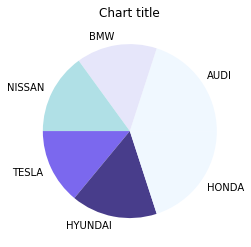

In [27]:
#Creating the dataset
cars = ['AUDI', 'BMW', 'NISSAN', 
        'TESLA', 'HYUNDAI', 'HONDA'] 
data = [20, 15, 15, 14, 16, 20] 
#Creating the pie chart
plt.pie(data, labels = cars,colors = ['#F0F8FF','#E6E6FA','#B0E0E6','#7B68EE','#483D8B'])
#Adding the aesthetics
plt.title('Chart title')
#Show the plot
plt.show()

([<matplotlib.patches.Wedge at 0x21ab1ce3eb0>,
 [Text(0.8899186877588753, 0.6465637858537406, 'AUDI'),
  Text(-0.17207795223283848, 1.086457168210212, 'BMW'),
  Text(-0.9801072140121811, 0.4993894763020951, 'NISSAN'),
  Text(-0.9953097129848341, -0.46835731577295503, 'TESLA'),
  Text(-0.20611935297230657, -1.0805159935559852, 'HYUNDAI'),
  Text(0.8899187482945414, -0.6465637025335375, 'HONDA')])

Text(0.5, 1.0, 'Chart title')

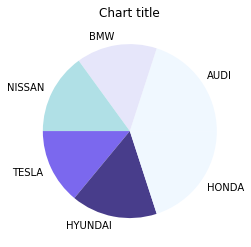

In [28]:

#Creating the dataset
cars = ['AUDI', 'BMW', 'NISSAN', 
        'TESLA', 'HYUNDAI', 'HONDA'] 
data = [20, 15, 15, 14, 16, 20] 

#Creating the pie chart
plt.pie(data, labels = cars,colors = ['#F0F8FF','#E6E6FA','#B0E0E6','#7B68EE','#483D8B'])

#)

#Adding the aesthetics
plt.title('Chart title')

#Show the plot
plt.show()

### Area chart

### Area charts are used to track changes over time for one or more groups. Area graphs are preferred over line charts when we want to capture the changes over time for more than 1 group.

### Area chart using Matplotlib

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

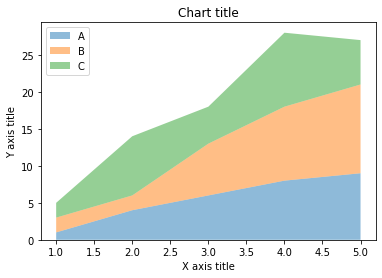

In [29]:
#Reading the dataset
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]

#Creating the area chart 
ax = plt.gca()
ax.stackplot(x, y, labels=['A','B','C'],alpha=0.5)

#Adding the aesthetics
plt.legend(loc='upper left')
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')

#Show the plot
plt.show()


**Area chart using Seaborn**

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

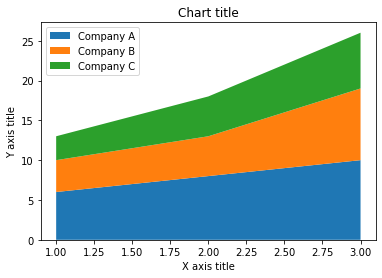

In [30]:
# Data
years_of_experience =[1,2,3]
salary=[ [6,8,10], [4,5,9], [3,5,7] ]

# Plot
plt.stackplot(years_of_experience,salary, labels=['Company A','Company B','Company C'])
plt.legend(loc='upper left')

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

# Show the plot
plt.show()


### Column histogram
### Column histograms are used to observe the distribution for a single variable with few data points.

### Column chart using Matplotlib

(array([ 3., 22., 52., 79., 44., 15., 42., 42., 28., 15.]),
 array([172. , 177.9, 183.8, 189.7, 195.6, 201.5, 207.4, 213.3, 219.2,
        225.1, 231. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

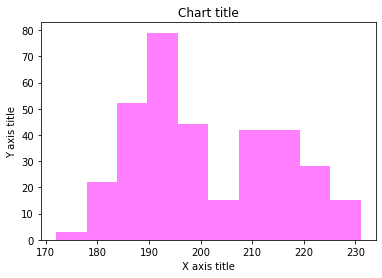

In [31]:
#Creating the dataset
penguins = sns.load_dataset("penguins")

#Creating the column histogram
ax = plt.gca()
ax.hist(penguins['flipper_length_mm'], color='magenta',alpha=0.5, bins=10)

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

#Show the plot
plt.show()


### Column chart using Seaborn

Text(0.5, 1.0, 'Chart title')

Text(0.5, 6.79999999999999, 'X axis title')

Text(10.049999999999997, 0.5, 'Y axis title')

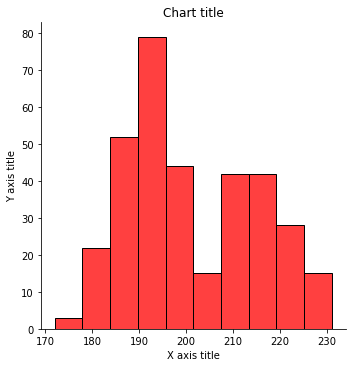

In [32]:
#Reading the dataset
penguins_dataframe = sns.load_dataset("penguins")

#Plotting bar histogram
sns.displot(penguins_dataframe['flipper_length_mm'], kde=False, color='red', bins=10)

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

# Show the plot
plt.show()

### Line histogram

### Line histograms are used to observe the distribution for a single variable with many data points.

### Line histogram chart using Matplotlib

In [33]:
#Creating the dataset
# df_1 = np.random.normal(0, 1, (1000, ))
# density = stats.gaussian_kde(df_1)

# #Creating the line histogram
# n, x, _ = plt.hist(df_1, bins=np.linspace(-3, 3, 50), histtype=u'step', density=True)  
# plt.plot(x, density(x))

# #Adding the aesthetics
# plt.title('Chart title')
# plt.xlabel('X axis title')
# plt.ylabel('Y axis title') 

# #Show the plot
# plt.show()


#cant find the data set csv

### Line histogram chart using Seaborn

C:\Users\holly\anaconda3\envs\Pandas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

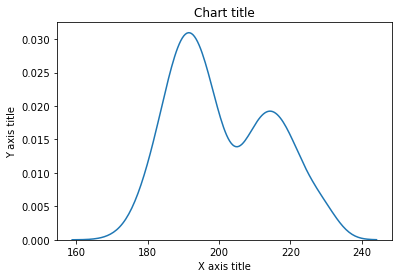

In [34]:
#Reading the dataset
penguins_dataframe = sns.load_dataset("penguins")

#Plotting line histogram
sns.distplot(penguins_dataframe['flipper_length_mm'], hist = False, kde = True, label='Africa')

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

# Show the plot
plt.show()

### Scatter plot

### Scatter plots can be leveraged to identify relationships between two variables. It can be effectively used in circumstances where the dependent variable can have multiple values for the independent variable.

### Scatter plot using Matplotlib

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

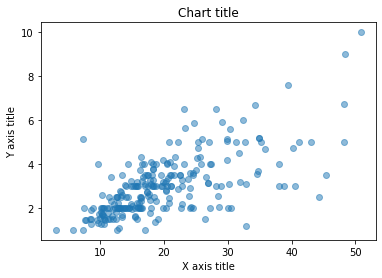

In [35]:
#Creating the dataset
df = sns.load_dataset("tips")

#Creating the scatter plot
plt.scatter(df['total_bill'],df['tip'],alpha=0.5 )

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')

#Show the plot
plt.show()


**Scatter plot using Seaborn**

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

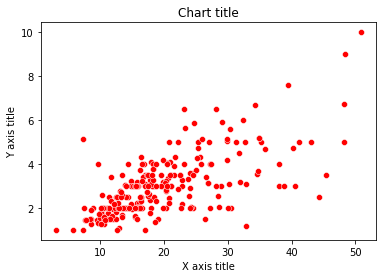

In [36]:
#Reading the dataset
bill_dataframe = sns.load_dataset("tips")

#Creating scatter plot
sns.scatterplot(data=bill_dataframe, x="total_bill", y="tip", color='red')

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
# Show the plot
plt.show()

### Bubble chart

### Scatter plots can be leveraged to depict and show relationships among three variables.

### Bubble chart using Matplotlib

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

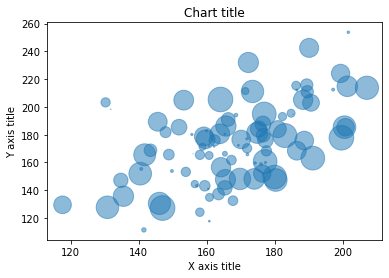

In [37]:
#Creating the dataset
np.random.seed(42)
N = 100
x = np.random.normal(170, 20, N)
y = x + np.random.normal(5, 25, N)
colors = np.random.rand(N)
area = (25 * np.random.rand(N))**2
df = pd.DataFrame({
    'X': x,
    'Y': y,
    'Colors': colors,
    "bubble_size":area})

#Creating the bubble chart
plt.scatter('X', 'Y', s='bubble_size',alpha=0.5, data=df)

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

#Show the plot
plt.show()

### Bubble chart using Seaborn

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

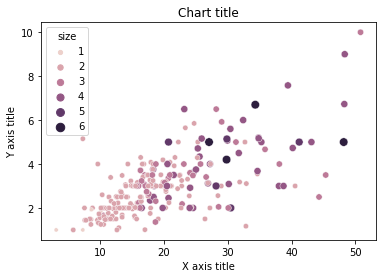

In [38]:
#Reading the dataset
bill_dataframe = sns.load_dataset("tips")

#Creating bubble plot
sns.scatterplot(data=bill_dataframe, x="total_bill", y="tip", hue="size", size="size")

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')

# Show the plot
plt.show()

### Box plot

### A box plot is used to show the shape of the distribution, its central value, and its variability.

### Box plot using Matplotlib

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

([<matplotlib.axis.XTick at 0x21ab2170ca0>,
 [Text(0, 0, 'A'), Text(2, 0, 'B'), Text(4, 0, 'C')])

(-2.0, 6.0)

(0.0, 8.0)

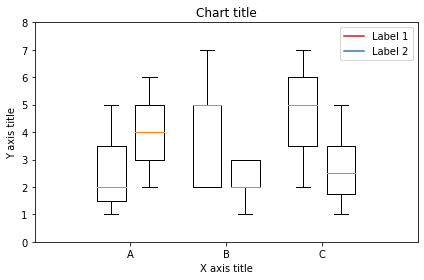

In [39]:
from past.builtins import xrange

#Creating the dataset
df_1 = [[1,2,5], [5,7,2,2,5], [7,2,5]]
df_2 = [[6,4,2], [1,2,5,3,2], [2,3,5,1]]

#Creating the box plot
ticks = ['A', 'B', 'C']
plt.figure()
bpl = plt.boxplot(df_1, positions=np.array(xrange(len(df_1)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(df_2, positions=np.array(xrange(len(df_2)))*2.0+0.4, sym='', widths=0.6)
plt.plot([], c='#D7191C', label='Label 1')
plt.plot([], c='#2C7BB6', label='Label 2')

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
plt.legend()
plt.xticks(xrange(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 8)
plt.tight_layout()

#Show the plot
plt.show()

### Box plot using Seaborn

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

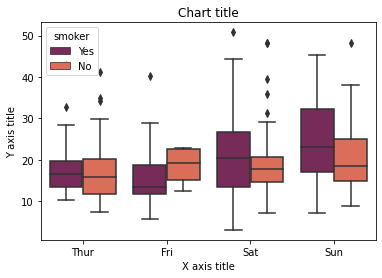

In [40]:
#Reading the dataset
bill_dataframe = sns.load_dataset("tips")

#Creating boxplots
ax = sns.boxplot(x="day", y="total_bill", hue="smoker", data=bill_dataframe, palette="rocket")

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')

# Show the plot
plt.show()

### Waterfall chart

### A waterfall chart can be used to explain the gradual transition in value of a variable that is subjected to increments or decrements


Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

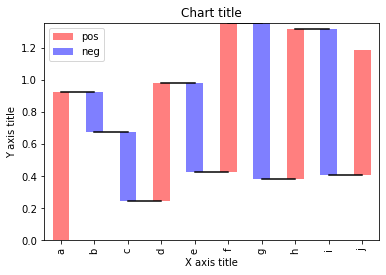

In [41]:
#Reading the dataset
test = pd.Series(-1 + 2 * np.random.rand(10), index=list('abcdefghij'))

#Function for making a waterfall chart
def waterfall(series):
    df = pd.DataFrame({'pos':np.maximum(series,0),'neg':np.minimum(series,0)})
    blank = series.cumsum().shift(1).fillna(0)
    df.plot(kind='bar', stacked=True, bottom=blank, color=['r','b'], alpha=0.5)
    step = blank.reset_index(drop=True).repeat(3).shift(-1)
    step[1::3] = np.nan
    plt.plot(step.index, step.values,'k')
    
#Creating the waterfall chart
waterfall(test)

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')

#Show the plot
plt.show()


### Venn diagram

### Venn diagrams are used to see the relationships between two or three sets of items. It highlights the similarities and differences


In [42]:
#pip install matplotlib-venn

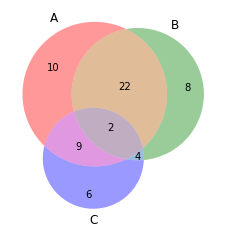

In [43]:
from matplotlib_venn import venn3

#Making venn  diagram
venn3(subsets = (10, 8, 22, 6,9,4,2))
plt.show()

### Tree map

### Tree Maps are primarily used to display data that is grouped and nested in a hierarchical structure and observe the contribution of each component


In [45]:
#pip install squarify

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

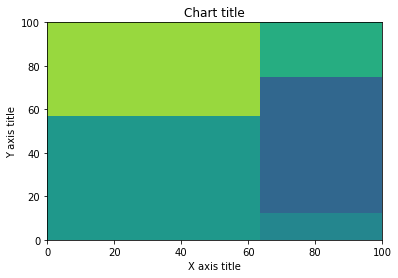

In [46]:
import squarify 
sizes = [40, 30, 5, 25, 10]
squarify.plot(sizes)

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
# Show the plot
plt.show()

### 100% stacked bar chart

### A 100% stacked bar chart can be leveraged when we want to show the relative differences within each group for the different sub-groups available


<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x21ab3f79790>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E')])

Text(0.5, 0, 'group')

Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

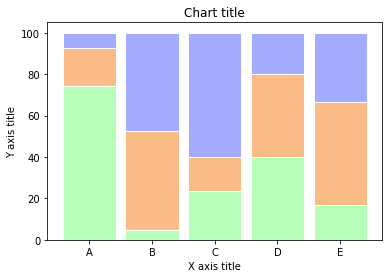

In [47]:
#100% stacked bar chart
#A 100% stacked bar chart can be leveraged when we want to show the relative differences within each group for the different sub-groups available

#Reading the dataset
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]

# plot
barWidth = 0.85
names = ('A','B','C','D','E')

# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)

# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)

# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")

#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title')  
plt.show()


### Marginal plots

### Marginal plots are used to assess the relationship between two variables and examine their distributions. Such plots scatter plots that have histograms, box plots, or dot plots in the margins of respective x and y axes


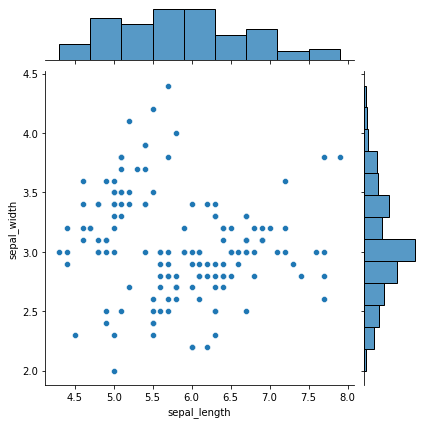

In [48]:
#Reading the dataset
iris_dataframe = sns.load_dataset('iris')

#Creating marginal graphs
sns.jointplot(x=iris_dataframe["sepal_length"], y=iris_dataframe["sepal_width"], kind='scatter')

# Show the plot
plt.show()

### Subplots

### Subplots are powerful visualizations that help easy comparisons between plots


Text(0.5, 1.0, 'Chart title')

Text(0.5, 0, 'X axis title')

Text(0, 0.5, 'Y axis title')

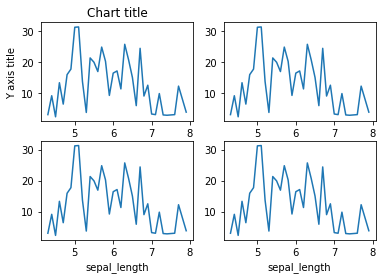

In [49]:
#Creating the dataset
df = sns.load_dataset("iris") 
df=df.groupby('sepal_length')['sepal_width'].sum().to_frame().reset_index()

#Creating the subplot
fig, axes = plt.subplots(nrows=2, ncols=2)
ax=df.plot('sepal_length', 'sepal_width',ax=axes[0,0])
ax.get_legend().remove()

#Adding the aesthetics
ax.set_title('Chart title')
ax.set_xlabel('X axis title')
ax.set_ylabel('Y axis title')
ax=df.plot('sepal_length', 'sepal_width',ax=axes[0,1])
ax.get_legend().remove()
ax=df.plot('sepal_length', 'sepal_width',ax=axes[1,0])
ax.get_legend().remove()
ax=df.plot('sepal_length', 'sepal_width',ax=axes[1,1])
ax.get_legend().remove()

#Show the plot
plt.show()
